In [1]:
############### Original: https://github.com/volkserg/CSE-CIC-IDS2018-learning_models/blob/main/preprocessing.ipynb

####### Modified and added further preprocess optimizations

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import dask.dataframe as dd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
LABELS_7 = {'Benign':0,#normal
            
            #bruteforce
            'SSH-Bruteforce':1,
            'FTP-BruteForce':1,
            
            #Web
            'Brute Force -Web':2,
            'Brute Force -XSS':2,
            'SQL Injection':2,

            #DDOS
            'DDOS attack-HOIC':3,
            'DDOS attack-LOIC-UDP':3,
            'DDoS attacks-LOIC-HTTP':3,

            #dos
            'DoS attacks-Slowloris':4,
            'DoS attacks-Hulk':4,
            'DoS attacks-GoldenEye':4,
            'DoS attacks-SlowHTTPTest':4,
            
            
            'Bot':5,
            'Infilteration':6,
          }
FILENAMES = ['data/02-20-2018.csv', 'data/02-21-2018.csv', 'data/02-22-2018.csv',
             'data/02-23-2018.csv', 'data/02-28-2018.csv', 'data/03-01-2018.csv',
             'data/03-02-2018.csv']

In [3]:
### delete duplicate headers in full_datset.csv so that only the first row contains the column headers

##### use dict comprehension over list comprehension
def convert_file_labels():
    replacements = {k: v for k, v in LABELS_7.items()}
    for f in FILENAMES:
        df = pd.read_csv(f)
        df['Label'] = df['Label'].replace(replacements)
        df.to_csv("multiclass/{}".format(f), index=False, encoding='utf-8-sig')

##convert_file_labels() <-- total time: 15 min bruh

In [5]:
for csv_file in csv_files:
    with open(os.path.join(dir_path, csv_file), 'r') as input_file:
        lines = input_file.readlines()
    with open(os.path.join(dir_path, csv_file), 'w') as output_file:
        for line in lines:
            if not any(val.strip() in ['nan', 'inf', '-inf'] for val in line.split(',')):
                output_file.write(line)

NameError: name 'csv_files' is not defined

In [5]:
### Count the total number of values for the "Label" column in each file within csv_files list
### map file name 
import os
import csv
import random

dir_path = 'multiclass/data/'
output_file = 'multiclass/data/complete_dataset.csv'
csv_files = [f for f in os.listdir(dir_path) if f.endswith('.csv')]

# initialize a dictionary to keep track of the label counts for each file
label_counts = {}

for csv_file in csv_files:
    # initialize a counter for the label counts for this file
    file_label_counts = {}
    
    with open(os.path.join(dir_path, csv_file), 'r') as infile:
        reader = csv.reader(infile)
        header = next(reader) # read the header and discard it
        for row in reader:
            # get the label from the row
            label = row[-1]
            # update the label count for this label in this file
            file_label_counts[label] = file_label_counts.get(label, 0) + 1
    
    # update the label counts for this file in the overall label counts dictionary
    label_counts[csv_file] = file_label_counts

    # print the label counts for this file
    print(f"Label counts for {csv_file}: {file_label_counts}")

# print the overall label counts for all files
print(f"Overall label counts for all files: {label_counts}")

Label counts for 02-14-2018.csv: {'0': 663808, '1': 380943}
Label counts for 02-15-2018.csv: {'0': 988050, '4': 52498}
Label counts for 02-20-2018.csv: {'0': 7313104, '3': 576191}
Label counts for 02-21-2018.csv: {'0': 360833, '3': 687742}
Label counts for 03-01-2018.csv: {'0': 236367, '6': 92403}
Label counts for 03-02-2018.csv: {'0': 758334, '5': 286191}
Label counts for 02-23-2018.csv: {'0': 1042301, '2': 566}
Label counts for 02-22-2018.csv: {'0': 1042603, '2': 362}
Label counts for 02-16-2018.csv: {'0': 446772, '4': 601802}
Label counts for 02-28-2018.csv: {'0': 540466, '6': 68493}
Overall label counts for all files: {'02-14-2018.csv': {'0': 663808, '1': 380943}, '02-15-2018.csv': {'0': 988050, '4': 52498}, '02-20-2018.csv': {'0': 7313104, '3': 576191}, '02-21-2018.csv': {'0': 360833, '3': 687742}, '03-01-2018.csv': {'0': 236367, '6': 92403}, '03-02-2018.csv': {'0': 758334, '5': 286191}, '02-23-2018.csv': {'0': 1042301, '2': 566}, '02-22-2018.csv': {'0': 1042603, '2': 362}, '02-16

In [6]:
import os
import csv
import random

dir_path = 'multiclass/data/'
output_file = 'multiclass/data/complete_dataset.csv'
csv_files = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
total_lines = 1500000  # Total number of lines to be read

# Shuffle the list of CSV files randomly
random.shuffle(csv_files)

# Initialize counters for total number of lines read and number of CSV files read
num_lines_read = 0
num_csv_files_read = 0

with open(output_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    # Iterate over the list of CSV files until the desired number of lines are read
    while num_lines_read < total_lines and num_csv_files_read < len(csv_files):
        csv_file = csv_files[num_csv_files_read]
        with open(os.path.join(dir_path, csv_file), 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip the header row
            next(reader)
            
            # Iterate over the rows in the CSV file until the desired number of lines are read
            for row in reader:
                if num_lines_read < total_lines:
                    writer.writerow(row)
                    num_lines_read += 1
                else:
                    break
                    
        num_csv_files_read += 1

print(f"Total lines read: {num_lines_read}")


In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Read CSV").getOrCreate()

df = spark.read.csv("multiclass/data/complete_dataset.csv", header=True, inferSchema=True)
df

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/04/27 20:03:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


DataFrame[Dst Port: string, Protocol: string, Timestamp: string, Flow Duration: string, Tot Fwd Pkts: int, Tot Bwd Pkts: int, TotLen Fwd Pkts: string, TotLen Bwd Pkts: double, Fwd Pkt Len Max: int, Fwd Pkt Len Min: int, Fwd Pkt Len Mean: double, Fwd Pkt Len Std: double, Bwd Pkt Len Max: double, Bwd Pkt Len Min: double, Bwd Pkt Len Mean: double, Bwd Pkt Len Std: double, Flow Byts/s: double, Flow Pkts/s: double, Flow IAT Mean: double, Flow IAT Std: double, Flow IAT Max: double, Flow IAT Min: double, Fwd IAT Tot: double, Fwd IAT Mean: double, Fwd IAT Std: double, Fwd IAT Max: double, Fwd IAT Min: double, Bwd IAT Tot: double, Bwd IAT Mean: double, Bwd IAT Std: double, Bwd IAT Max: double, Bwd IAT Min: double, Fwd PSH Flags: double, Bwd PSH Flags: double, Fwd URG Flags: double, Bwd URG Flags: double, Fwd Header Len: int, Bwd Header Len: int, Fwd Pkts/s: double, Bwd Pkts/s: double, Pkt Len Min: int, Pkt Len Max: int, Pkt Len Mean: double, Pkt Len Std: double, Pkt Len Var: double, FIN Flag Cn

In [7]:
from pyspark.sql import functions as F

df = df.withColumn('Flow Duration', F.col('Flow Duration').cast('double'))
df = df.withColumn('Protocol', F.col('Protocol').cast('int'))
df = df.withColumn('Dst Port', F.col('Dst Port').cast('int'))
df = df.withColumn('Label', F.col('Label').cast('int'))
df = df.withColumn('TotLen Fwd Pkts', F.col('TotLen Fwd Pkts').cast('double'))
df = df.withColumn('Timestamp', F.unix_timestamp('Timestamp', "dd/MM/yyyy HH:mm:ss"))
print(f"DataFrame size: {df.count()} x {len(df.columns)}")
print(df)
df.show()

DataFrame size: 16139829 x 80
DataFrame[Dst Port: int, Protocol: int, Timestamp: bigint, Flow Duration: double, Tot Fwd Pkts: int, Tot Bwd Pkts: int, TotLen Fwd Pkts: double, TotLen Bwd Pkts: double, Fwd Pkt Len Max: int, Fwd Pkt Len Min: int, Fwd Pkt Len Mean: double, Fwd Pkt Len Std: double, Bwd Pkt Len Max: double, Bwd Pkt Len Min: double, Bwd Pkt Len Mean: double, Bwd Pkt Len Std: double, Flow Byts/s: double, Flow Pkts/s: double, Flow IAT Mean: double, Flow IAT Std: double, Flow IAT Max: double, Flow IAT Min: double, Fwd IAT Tot: double, Fwd IAT Mean: double, Fwd IAT Std: double, Fwd IAT Max: double, Fwd IAT Min: double, Bwd IAT Tot: double, Bwd IAT Mean: double, Bwd IAT Std: double, Bwd IAT Max: double, Bwd IAT Min: double, Fwd PSH Flags: double, Bwd PSH Flags: double, Fwd URG Flags: double, Bwd URG Flags: double, Fwd Header Len: int, Bwd Header Len: int, Fwd Pkts/s: double, Bwd Pkts/s: double, Pkt Len Min: int, Pkt Len Max: int, Pkt Len Mean: double, Pkt Len Std: double, Pkt Len 

23/04/27 20:04:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+--------+----------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+----

In [8]:
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

for col_name in df.columns:
    df = df.filter(col(col_name) >= 0)

print(f"Dataframe shape: {df.count()} x {len(df.columns)}")

Dataframe shape: 4237696 x 80


In [9]:
df.show()

+--------+--------+----------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----

In [10]:
df = df.coalesce(1)
path = 'multiclass/data/cleaned.csv'
df.write.format('csv').option('header', 'true').mode('overwrite').save(path)

In [97]:
train_timestamps = train_df.select("Timestamp")
train_labels = train_df.select("Label")
train_df = train_df.drop("Timestamp")
train_df = train_df.drop("Label")
train_df.show()

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+---------------+------------------+------------------+------------+------------+------------+------------------+------------------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+---------------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+------------

In [98]:
test_timestamps = test_df.select("Timestamp")
test_labels = test_df.select("Label")
test_df = test_df.drop("Timestamp")
test_df = test_df.drop("Label")
test_df.show()

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-------------+-------------+------------------+------------+------------+------------+------------+------------------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+---------

In [99]:
### Write train_df, train_timestamps, train_labels, test_df, test_timestamps, test_labels to new CSV files in train_test_data folder
outfile_train_df = "train_test_data/train_data.csv"
outfile_train_timestamps = "train_test_data/train_timestamps.csv"
outfile_train_labels = "train_test_data/train_labels.csv"
outfile_test_df = "train_test_data/test_data.csv"
outfile_test_timestamps = "train_test_data/test_timestamps.csv"
outfile_test_labels = "train_test_data/test_labels.csv"


train_df.write.format("csv").option("header", "true").save(outfile_train_df)
train_timestamps.write.format("csv").option("header", "true").save(outfile_train_timestamps)
train_labels.write.format("csv").option("header", "true").save(outfile_train_labels)

test_df.write.format("csv").option("header", "true").save(outfile_test_df)
test_timestamps.write.format("csv").option("header", "true").save(outfile_test_timestamps)
test_labels.write.format("csv").option("header", "true").save(outfile_test_labels)

In [ ]:
dataset_rows = df.count()
dataset_cols = len(df.columns)

print(f"Size: {dataset_rows} x {dataset_cols}")

+--------------------+-------------------+-----+
|            features|          Timestamp|Label|
+--------------------+-------------------+-----+
|(78,[2,3,16,17,18...|14/02/2018 01:00:51|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:01:21|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:01:58|    0|
|(78,[2,3,16,17,19...|14/02/2018 01:01:59|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:03:34|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:04:10|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:04:43|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:04:43|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:04:43|    0|
|(78,[2,3,16,17,19...|14/02/2018 01:04:48|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:06:29|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:06:46|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:06:46|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:06:59|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:07:11|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:08:46|    0|
|(78,[2,3,16,17,18...|14/02/2018 01:09:18|    0|
|(78,[2,3,16,17,18..

In [2]:
df = pd.read_csv('multiclass/data/cleaned_data.csv')

In [3]:
#### Call standard scaler on data
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [4]:
###Clean dataframe infinity/-infinity/NaN values
df = df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

print(df['Label'].value_counts())



0    3262031
1     380938
4     201842
3     163750
5     143014
6      85639
2        441
Name: Label, dtype: int64


## We notice that compared to the other categories, Attacks (esp Web attacks in 2) are heavily underrepresented, so we use the SMOTE algorithm to oversample these data.



In [ ]:
ddf = dd.from_pandas(df, npartitions=2)

ddf.replace([np.inf, -np.inf], np.nan)
ddf = ddf.dropna()

X = ddf.drop('Label', axis=1)
y = ddf['Label']
label_counts = Counter(y.compute())
target = label_counts[1]
smote = SMOTE(sampling_strategy={label: target for label in label_counts.keys() if label_counts[label] < target},
              k_neighbors=5, random_state=2435)

#find 

X_resampled, y_resampled = smote.fit_resample(X.compute(), y.compute())
# ddf_resampled = dd.from_array(X_resampled, columns=X.columns).assign(Label=y_resampled)
# print(ddf_resampled['Label'].value_counts().compute())

#Runtime: 2 hours...

In [ ]:
X_resampled.to_csv('X_resampled.csv')
y_resampled.to_csv('y_resampled.csv')

In [2]:
X = dd.read_csv('X_resampled.csv')
y = dd.read_csv('y_resampled.csv')

In [3]:
df_resampled = dd.concat([X,y])

In [4]:
df_resampled['Label'].value_counts().compute()

0.0    3262031
1.0     380938
2.0     380938
3.0     380938
4.0     380938
5.0     380938
6.0     380938
Name: Label, dtype: int64

In [5]:
y = y.drop('Unnamed: 0', axis=1)
y.compute()

,Label
0,0
1,0
2,0
3,0
4,0
...,...
5547654,6
5547655,6
5547656,6
5547657,6


In [6]:
label_counts = Counter(y.compute())
rus = RandomUnderSampler(sampling_strategy='auto',
                         random_state=2435)
undersampled_ddf_X, undersampled_ddf_y = rus.fit_resample(X.compute(), y.compute())

In [9]:
ddf = dd.concat([undersampled_ddf_X, undersampled_ddf_y], axis=1)
ddf['Label'].value_counts().compute()

0    380938
1    380938
2    380938
3    380938
4    380938
5    380938
6    380938
Name: Label, dtype: int64

In [10]:
ddf.compute().to_csv('data_resampled.csv')

In [36]:
ddf['Label'] = ddf['Label'].replace([2, 3, 4, 5, 6], 1)
ddf['Label'].value_counts().compute()

1    2285628
0     380938
Name: Label, dtype: int64

In [37]:
X = ddf.drop('Label', axis=1)
y = ddf['Label']
rus = RandomUnderSampler(sampling_strategy='auto',
                         random_state=2435)
undersampled_ddf_X, undersampled_ddf_y = rus.fit_resample(X.compute(), y.compute())

In [47]:
ddf = pd.concat([undersampled_ddf_X, undersampled_ddf_y], axis=1)
ddf['Label'].value_counts()

0    380938
1    380938
Name: Label, dtype: int64

In [48]:
X = ddf.drop('Label', axis=1)
y = ddf['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# X_train = X_train.drop('Unnamed: 0', axis=1)
# X_test = X_test.drop('Unnamed: 0', axis=1)
X_train_arr = X_train.to_numpy()
y_train_arr = y_train.to_numpy()
X_test_arr = X_test.to_numpy()
y_test_arr = y_test.to_numpy()

print(X_train_arr.shape)
print(y_train_arr.shape)
print(X_test_arr.shape)
print(y_test_arr.shape)

(609500, 80)
(609500,)
(152376, 80)
(152376,)


In [30]:
X_train.to_csv('X_train.csv')

In [51]:
np.save("data/X_train_b.npy", X_train_arr)
np.save("data/y_train_b.npy", y_train_arr)
np.save("data/X_test_b.npy", X_test_arr)
np.save("data/y_test_b.npy", y_test_arr)

In [31]:
X_train

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
619712,22,6,1518597441,3.902870e+05,25,20,1928.0,2665.0,640,0,...,16,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16419,3389,6,1519378828,3.870503e+06,14,8,1440.0,1731.0,725,0,...,7,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2379610,1911,6,1519922858,3.000000e+00,1,1,0.0,0.0,0,0,...,0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790074,21,6,1518798267,2.000000e+00,1,1,0.0,0.0,0,0,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627984,21,6,1518798058,2.000000e+00,1,1,0.0,0.0,0,0,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,49499,6,1519309713,4.400000e+01,1,1,0.0,0.0,0,0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1692743,21,6,1518799391,2.000000e+01,1,1,0.0,0.0,0,0,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2356330,62078,6,1519893740,2.440000e+02,1,1,0.0,0.0,0,0,...,0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229084,8080,6,1520011470,1.141399e+04,3,4,326.0,129.0,326,0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X = np.random.rand(150, 15)
X_s = X.reshape(X, (X.shape[0], 1, X.shape[1]))
X_s.shape

TypeError: only integer scalar arrays can be converted to a scalar index

array([[2.391000e+05, 2.200000e+01, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.694600e+06, 3.389000e+03, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.445419e+06, 1.911000e+03, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.761112e+06, 6.207800e+04, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.216461e+06, 8.080000e+03, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.246823e+06, 8.080000e+03, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [ ]:
## write them to npy arrays
np.save("data/X_train.npy", X)


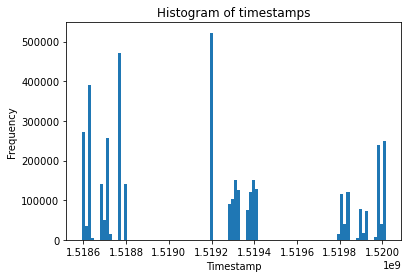

In [15]:
timestamp_data = timestamps.values
plt.hist(timestamp_data, bins=100)
plt.title("Histogram of timestamps")
plt.xlabel("Timestamp")
plt.ylabel("Frequency")
plt.show()

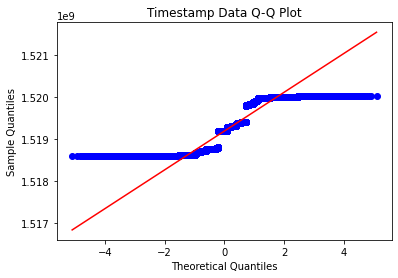

In [18]:
from scipy.stats import probplot
timestamp_data = np.ravel(timestamps)
probplot(timestamp_data, plot=plt)
plt.title('Timestamp Data Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [2]:
df = pd.read_csv('dfscaled.csv')

In [3]:
timestamps = pd.read_csv('timestamps.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.1 MB/s eta 0:00:0000:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0

[notice] A new release of pip available: 22.2.2 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
df.insert(loc=2, column='Timestamps', value=timestamps)
df

,Dst Port,Protocol,Timestamps,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000320,0.0,27613,5.378304e-02,0.000241,0.000073,0.000142,0.000015,0.011546,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000320,0.0,27623,7.336721e-02,0.000224,0.000081,0.000131,0.000014,0.011546,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000320,0.0,27631,5.824450e-02,0.000258,0.000089,0.000142,0.000015,0.011546,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001205,0.0,28034,3.970933e-03,0.000069,0.000016,0.000024,0.000003,0.003274,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001205,0.0,28035,3.958725e-03,0.000069,0.000016,0.000025,0.000003,0.003414,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237650,0.000336,0.0,1249152,1.666667e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4237651,0.006470,0.0,1245004,8.333333e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4237652,0.006775,0.0,1252375,6.106058e-03,0.000017,0.000008,0.000000,0.000000,0.000000,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4237653,0.000336,0.0,1246250,1.750000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
####write this df to a csv file
df.to_csv('dfscaled.csv')

In [11]:
#filter the data by the label 4. We will graph this data as a timeseries

,Dst Port,Protocol,Timestamps,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000320,0.0,27613,5.378304e-02,0.000241,0.000073,0.000142,0.000015,0.011546,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000320,0.0,27623,7.336721e-02,0.000224,0.000081,0.000131,0.000014,0.011546,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000320,0.0,27631,5.824450e-02,0.000258,0.000089,0.000142,0.000015,0.011546,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001205,0.0,28034,3.970933e-03,0.000069,0.000016,0.000024,0.000003,0.003274,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001205,0.0,28035,3.958725e-03,0.000069,0.000016,0.000025,0.000003,0.003414,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237650,0.000336,0.0,1249152,1.666667e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4237651,0.006470,0.0,1245004,8.333333e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4237652,0.006775,0.0,1252375,6.106058e-03,0.000017,0.000008,0.000000,0.000000,0.000000,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4237653,0.000336,0.0,1246250,1.750000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
y_train_arr = np.where(y_train_arr>0, 1, y_train_arr)

array([1, 0, 1, ..., 1, 1, 1])